In [4]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#TensorfloW PACKAGES

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [6]:
train.drop(['keyword','location'],axis=1,inplace=True)
test.drop(['location','keyword'],axis=1,inplace=True)

In [7]:
SEED = 4243
TARGET = "target"

In [8]:
train = shuffle(train, random_state=SEED)
train = shuffle(train, random_state=int(SEED/2))
train.head()

,id,text,target
2342,3369,#download &amp; #watch Demolition Frog (2002) ...,1
6001,8572,@heyot6 Im not home. I need to watch. [Screams],0
6876,9859,Back in Ireland v. sad/traumatised as is freez...,0
7397,10584,Texas Seeks Comment on Rules for Changes to Wi...,0
1683,2428,The Witches of the Glass Castle. Supernatural ...,0


In [9]:
#Batch is a hyperparameter that can effect the model performance and training process. I can be 2,64,128 and so on.
#it depends on factors such as the size of your dataset, the available memory on your hardware, and the computational resources at your disposal.


#Convert train data to tf.data.Dataset object
BATCH = 32
#Concatenate the text data of the columns "text" and "target"
train_tf = tf.data.Dataset.from_tensor_slices(
    (train['text'], train[TARGET]))

#Convert the data into batch
train_tf = train_tf.shuffle(int((SEED*13)/8)).batch(BATCH)

#Convert test data to tf.data.Dataset object
test_tf = tf.data.Dataset.from_tensor_slices(test['text'])

#Convert the data into batch
test_tf = test_tf.batch(BATCH)

In [10]:
def check_max_length_sentence(df):
    max_length = 0
    for text in df["text"]:
        if len(text) > max_length:
            max_length = len(text)
    print("Maximum length of Text column is:",max_length)
check_max_length_sentence(train)

Maximum length of Text column is: 157


In [11]:

check_max_length_sentence(test)

Maximum length of Text column is: 151


In [12]:

max_length = 165
max_tokens = 20_000

#Instantiate the TextVectorization layer
text_vectorization = layers.TextVectorization(max_tokens=max_tokens,
                                              output_mode='int',
                                              output_sequence_length=max_length
                                             )

**twt:** This is a placeholder variable representing the text data in each training example. The name "twt" is an abbreviation for "tweet". It assumes that the training data consists of pairs where the first element is the text data (tweets, in this case) and the second element is the target value.

In [13]:

text_vectorization.adapt(train_tf.map(lambda twt, target: twt))

In [14]:
#Get the vocabulary
vocab = text_vectorization.get_vocabulary()
print("Vocabulary size =",len(vocab))

#Convert the list object to NumPy array for decoding the vectorized data
vocab = np.array(vocab)

Vocabulary size = 20000


**train_tf:** This variable represents the training dataset, which is assumed to be a **tf.data.Dataset** object.

**lambda twt, target:** (text_vectorization(twt), target): This lambda function is applied to each element of the training dataset. It takes a pair (twt, target) where twt is the text data and target is the target value. It then applies the text_vectorization layer to vectorize the text data and keeps the target value unchanged. The result is a pair (vectorized_text, target).

**num_parallel_calls=tf.data.AUTOTUNE:** This parameter is used to parallelize the mapping operation, allowing for faster processing. **tf.data.AUTOTUNE** automatically determines the level of parallelism based on available resources.

In [15]:
#Vectorize the train dataset
train_tf = train_tf.map(lambda twt, target: (text_vectorization(twt), target),
                   num_parallel_calls=tf.data.AUTOTUNE)

#Vectorize the test dataset
test_tf = test_tf.map(lambda twt: text_vectorization(twt),
                      num_parallel_calls=tf.data.AUTOTUNE)

In [16]:
#Define a function to print the tokenized data
def print_sample(data_obj):
    for sample, traget in data_obj:
        #Print the first item
        print("1st sample:",sample[0].numpy())
        print("\n")
        #Print the second item
        print("2nd sample:",sample[1].numpy())
        print("\n")
        #Print the third item
        print("3rd sample:",sample[2].numpy())
        print("\n")
        break

In [17]:
print_sample(train_tf)

1st sample: [ 113  646    5   48    5    3 2747 1619  389    6 2693   14   19 2111
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]


2nd sample: [  327    19     9    90     8   163   966     5   618    13   122   213
  1463     4     3    87  5683  2340   850 17293     0     0   

In [18]:
#Print the vectorized tweet and the decoded tweet
for tx in train_tf:
    print("\t\t\t\tVectorized Tweet:\n",tx[0][0])
    print("\n\n\t\t\t\tDecoded Tweet:\n", " ".join(vocab[tx[0][0].numpy()]))
    break

				Vectorized Tweet:
 tf.Tensor(
[  533   167    91   386    20    42  1317    10  1147  8657    33  6277
     5    24     3 10501 16101     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     

**TransformerEncoder(layers.Layer):** Transformers encoding defines a custom layer in TensorFlow/Keras for a Transformer Encoder. Transformers are a type of neural network architecture commonly used in natural language processing and other sequence-to-sequence tasks.The class TransformerEncoder is defined, inheriting from layers.Layer, indicating that it's a custom layer in Keras.

**Forward Pass Implementation (call method):**

The call method defines the forward pass for the layer.
If a mask is provided, it is expanded to match the shape of the inputs.
The attention mechanism is applied using the MultiHeadAttention layer (self.attention).
Layer normalization is applied to the sum of the inputs and the attention output (layernorm_1).
The result is passed through a dense layer (dense_prof).
Again, layer normalization is applied to the sum of the previous output and the dense layer output (layernorm_2).
The final result is the sum of the input and the output of the dense layer.

This code defines a custom Transformer Encoder layer with attention mechanism, dense layers, and layer normalization for processing sequential data in neural network models



In [19]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads

        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_prof = keras.Sequential(
            [layers.Dense(dense_dim, activation='relu'),
             layers.Dense(embed_dim),]
                                )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.max_pool1 = layers.GlobalMaxPooling1D()

    # Define all methods where forward pass is implement

    def call(self, inputs, mask = None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        # Apply the attention layers
        attention_output = self.attention(inputs, inputs, attention_mask = mask)
        #Normalizaion the data
        proj_input = self.layernorm_1(inputs + attention_output)
        #Apply Dense Layer
        proj_output= self.dense_prof(proj_input)
        #Normalization the data and return it
        return self.layernorm_2(proj_input + proj_output)

    #Define configuration methods
    def get_config(self):
        config = super().get_config()
        config_update({ #config.update
            'embed_dim' : self.embed_dim,
            'num_heads' : self.num_heads,
            'dense_dim': self.dense_dim
        })

        return config

In both cases, these classes are custom layers because they are defined as subclasses of layers.Layer, which is the way to create custom layers in TensorFlow/Keras. The term "custom layer" is often used interchangeably with "subclass of layers" in this context. The key aspect is that these classes extend the functionality of Keras layers to implement custom behavior.

In [20]:
# Implement Positional embedding as a subclass layers
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.sequence_legth = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.token_embeddings = layers.Embedding(
            input_dim = input_dim, output_dim = output_dim)
        self.positional_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start = 0, limit=length,delta  =1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.positional_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask = None):
        return tf.math.not_equal(inputs , 0)

    def get_config(self):
        config = super().get_config()
        config.update({
            'output_dim' : self.output_dim,
            'sequence_lenght': self.sequence_legth,
            'input_dim': self.input_dim
        })
        return config


In [21]:
# Constract the model
# Define the input
inputs = keras.Input(shape=(None,), dtype='int64')

# apply positional embeddings
pos_embed = PositionalEmbedding(sequence_length=165,
                               input_dim=20_000,
                                output_dim=256)(inputs)

# apply the encoder
encoder = TransformerEncoder(embed_dim=256,
                            dense_dim=32,
                            num_heads =8)(pos_embed)
x = layers.GlobalMaxPooling1D()(encoder)
x = layers.Dropout(0.5)(x)
output = layers.Dense(units=1, activation='sigmoid')(x)
model = keras.Model(inputs= inputs, outputs = output)

In [22]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.98,epsilon=1e-9),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
             )

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 positional_embedding (Posi  (None, None, 256)         5162240   
 tionalEmbedding)                                                
                                                                 
 transformer_encoder (Trans  (None, None, 256)         2121248   
 formerEncoder)                                                  
                                                                 
 global_max_pooling1d_1 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

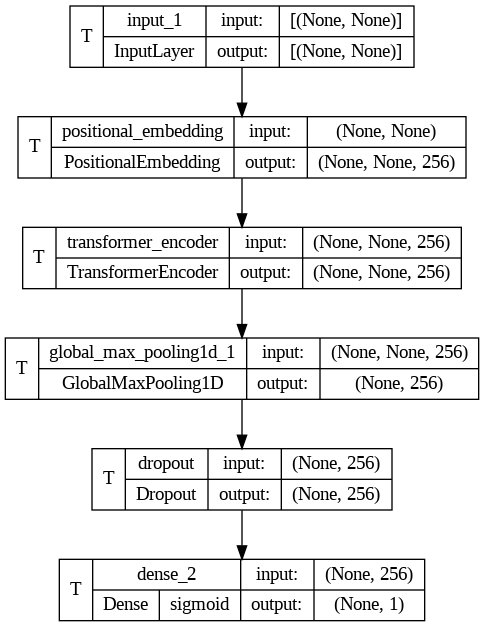

In [24]:
# plot model
keras.utils.plot_model(model=model,
                      to_file='model.png',
                      show_shapes = True,
                      show_layer_names=True,
                      expand_nested=True,
                      show_layer_activations=True,
                      show_trainable=True)

In [25]:
# Define validation Data
val_size = int(0.25 * len(train_tf))

In [26]:
# Split the dta into training and validation
validation_data = train_tf.take(val_size)
train_data = train_tf.skip(val_size)

In summary, the EarlyStopping callback is used to monitor the validation loss during training, and if there is no improvement for a specified number of epochs (patience),
the training process is stopped early.
With the specified patience=3, if the validation loss does not improve for three consecutive epochs, the training process will be stopped early.
This helps prevent overfitting and can save computational resources by avoiding unnecessary training epochs when the model's performance on the validation set has plateaued.

In [ ]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_gru = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(train_data,
                    epochs=35, # Number of epochs (iterations over the training dataset)
                    validation_data=validation_data,
                    callbacks=early_stopping_gru
                    )

Epoch 1/35
179/179 [==============================] - 614s 3s/step - loss: 1.2614 - accuracy: 0.5162 - val_loss: 0.6977 - val_accuracy: 0.5800
Epoch 2/35
 13/179 [=>............................] - ETA: 8:09 - loss: 1.0960 - accuracy: 0.5649

 # Number of batches= Total samples / Batch size



In [ ]:
model.evaluate(validation_data)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
Epochs = len(acc)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc, label='Training Accuracy')
plt.plot(range(Epochs),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(Epochs),loss, label='Training loss')
plt.plot(range(Epochs),val_loss, label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

In [ ]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Plotting the training and validation accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
prdictions = model.predict(test_tf)

In [ ]:
thresholds = 0.5
# convert the float values to binary
final_predictions = [1 if i > thresholds else 0 for i in prdictions]
final_predictions[:10]

In [ ]:
sample

In [ ]:
submisssion = pd.DataFrame(columns=['id','target'])
submisssion['target'] = final_predictions
submisssion['id'] = test.id
submisssion

In [ ]:
submisssion.to_csv('submission_final.csv',index=False)